# t2i adapter

essentially just took this code and copypastad: https://huggingface.co/docs/diffusers/en/using-diffusers/t2i_adapter

documentation for more control over outputs here: https://huggingface.co/docs/diffusers/v0.31.0/en/api/pipelines/stable_diffusion/adapter#diffusers.StableDiffusionAdapterPipeline

can also play with embedding inputs etc outside of the pipeline.

options for t2i adapters here: https://huggingface.co/TencentARC/t2iadapter_zoedepth_sd15v1

generally, I'd stick with sd 1.4 or 1.5 for ease of deployment (if I get really clever, I think I can deploy these models on CPU, for instance).

In [1]:
import cv2
import numpy as np
from PIL import Image
from diffusers.utils import load_image

import torch
from diffusers import StableDiffusionAdapterPipeline, T2IAdapter

/mnt/c/Users/hew7/Documents/venvs/RF-demos/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adapter = T2IAdapter.from_pretrained("TencentARC/t2iadapter_canny_sd15v2", torch_dtype=torch.float16)
pipeline = StableDiffusionAdapterPipeline.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5",
    adapter=adapter,
    torch_dtype=torch.float16,
).to("cuda")


An error occurred while trying to fetch TencentARC/t2iadapter_canny_sd15v2: TencentARC/t2iadapter_canny_sd15v2 does not appear to have a file named diffusion_pytorch_model.safetensors.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
Loading pipeline components...: 100%|█████████████████████████████████████████████████████| 7/7 [00:03<00:00,  1.78it/s]


In [3]:
input_image = load_image("https://www.qut.edu.au/__data/assets/image/0007/909781/qut-logo-og-1200.jpg")
input_image = np.array(input_image)

low_threshold = 100
high_threshold = 200

input_image = cv2.Canny(input_image, low_threshold, high_threshold)
input_image = Image.fromarray(input_image)

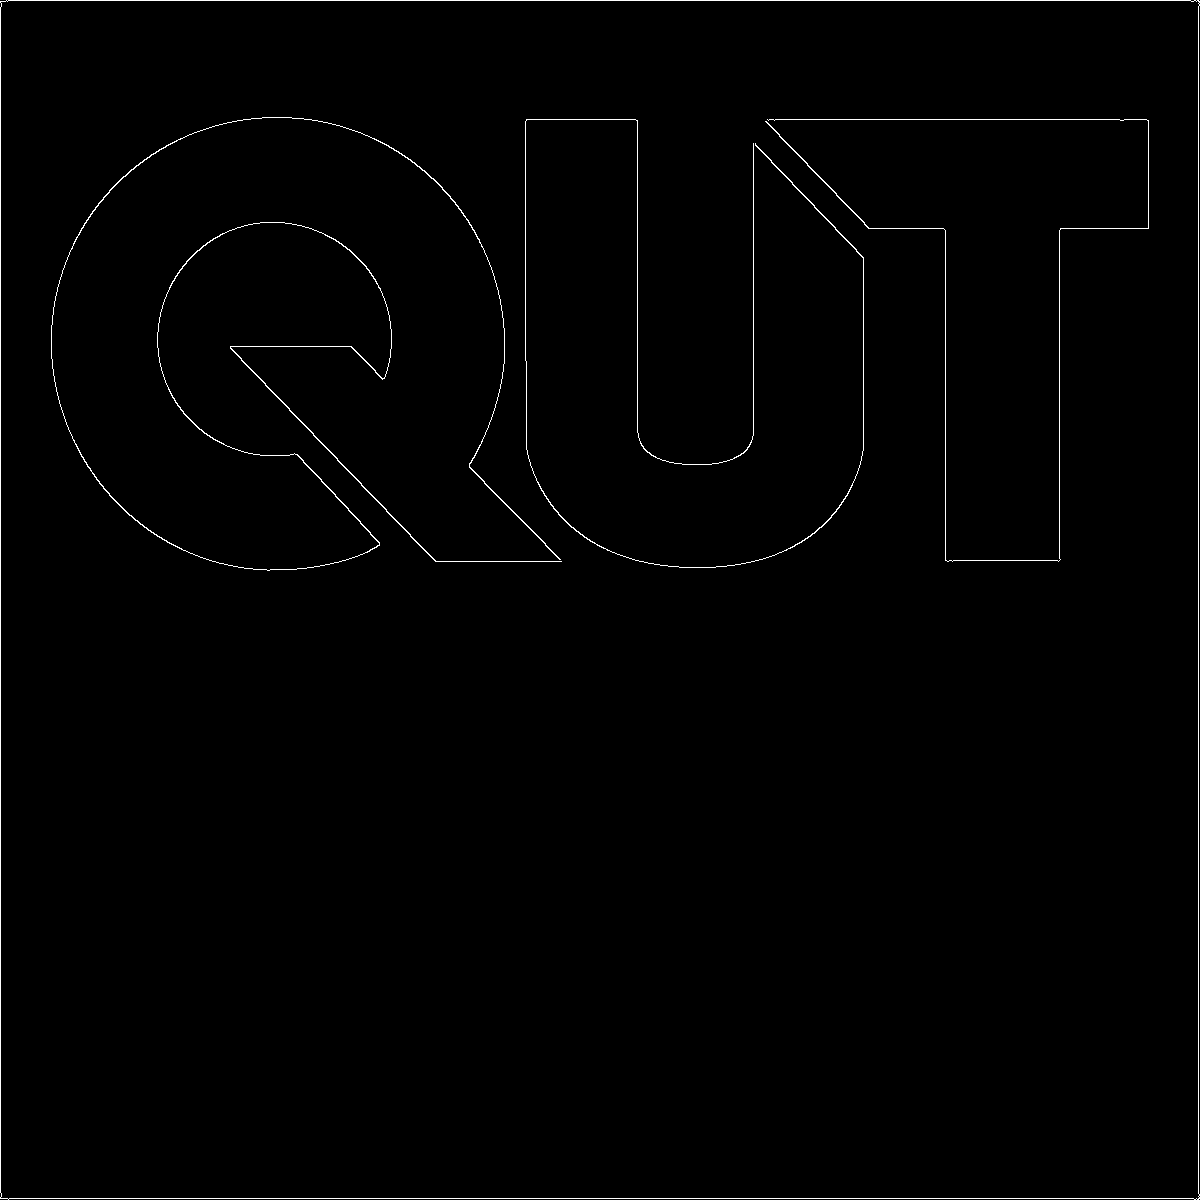

In [4]:
input_image

100%|███████████████████████████████████████████████████████████████████████████████████| 50/50 [01:19<00:00,  1.59s/it]


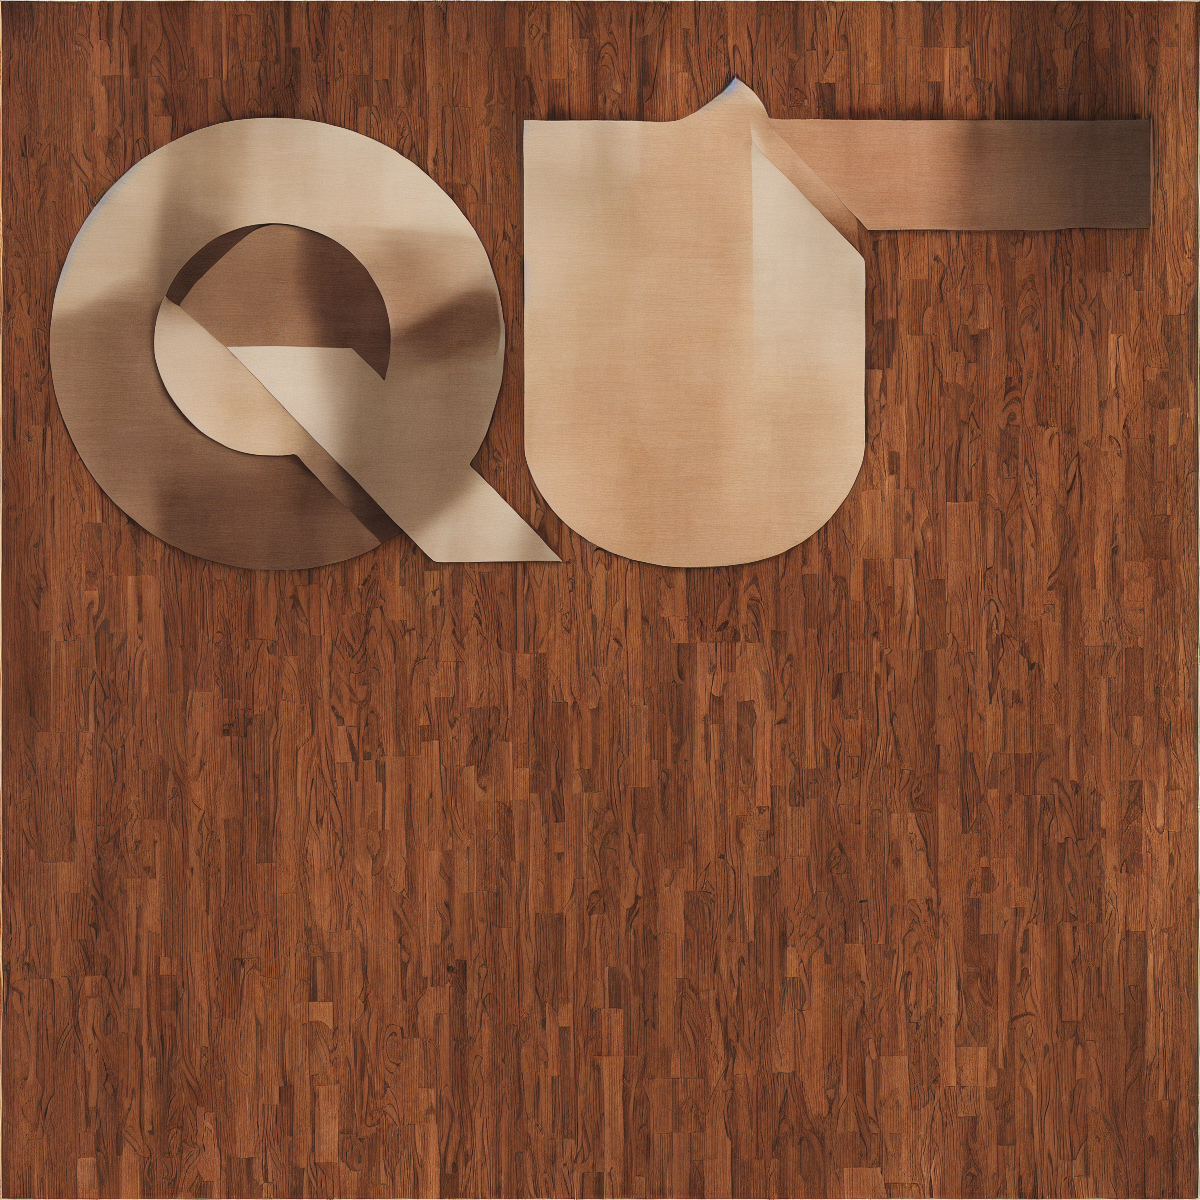

In [7]:
generator = torch.Generator("cuda").manual_seed(0)

image = pipeline(
    prompt="cinematic photo of a plush and soft midcentury style rug on a wooden floor, 35mm photograph, film, professional, 4k, highly detailed",
    image=input_image,
    generator=generator,
).images[0]
image